### Probablistic modeling on Banknotes dataset. 
#### To predict either the Note is Original or Fake

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('banknotes.csv')
data.tail()

,Variance,Skewness,Curtosis,Entropy,Class
1367,0.40614,1.34920,-1.4501,-0.55949,1
1368,-1.38870,-4.87730,6.4774,0.34179,1
1369,-3.75030,-13.45860,17.5932,-2.77710,1
1370,-3.56370,-8.38270,12.3930,-1.28230,1
1371,-2.54190,-0.65804,2.6842,1.19520,1


In [3]:
data.dtypes

Variance    float64
Skewness    float64
Curtosis    float64
Entropy     float64
Class         int64
dtype: object

In [4]:
data.Class.unique()

array([0, 1], dtype=int64)

In [5]:
data.Class.value_counts()

0    762
1    610
Name: Class, dtype: int64

In [6]:
data.shape

(1372, 5)

In [7]:
X = data.iloc[:,0:4]
X.head()

,Variance,Skewness,Curtosis,Entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [8]:
y = data.iloc[:,4]
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20)

In [10]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion='entropy')
model.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [11]:
y_pred = model.predict(X_test)

In [12]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [13]:
model.predict([[1.2,8.6661,-2.8073,-0.44699]])

c:\users\hp\python\python37\lib\site-packages\sklearn\base.py:442: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0], dtype=int64)

In [14]:
model.score(X_test,y_test)*100

100.0

In [15]:
from sklearn.metrics import confusion_matrix

In [16]:
confusion_matrix(y_test,y_pred)

array([[167,   0],
       [  0, 108]], dtype=int64)

In [17]:
# for criterian entropy
model.score(X_test,y_test)*100

100.0

In [18]:
from sklearn import tree
text_representation = tree.export_text(model)
print(text_representation)

|--- feature_0 <= 0.76
|   |--- feature_1 <= 5.16
|   |   |--- feature_0 <= -0.46
|   |   |   |--- feature_2 <= 6.22
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  6.22
|   |   |   |   |--- feature_1 <= -4.67
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- feature_1 >  -4.67
|   |   |   |   |   |--- feature_1 <= -2.24
|   |   |   |   |   |   |--- feature_3 <= -1.38
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  -1.38
|   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |--- feature_1 >  -2.24
|   |   |   |   |   |   |--- class: 0
|   |   |--- feature_0 >  -0.46
|   |   |   |--- feature_2 <= 0.47
|   |   |   |   |--- class: 1
|   |   |   |--- feature_2 >  0.47
|   |   |   |   |--- feature_3 <= 0.72
|   |   |   |   |   |--- feature_2 <= 1.12
|   |   |   |   |   |   |--- feature_3 <= -0.07
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- feature_3 >  -0.07
|   |   |   |   |   |   |   |--- class: 1
|   

In [19]:
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)

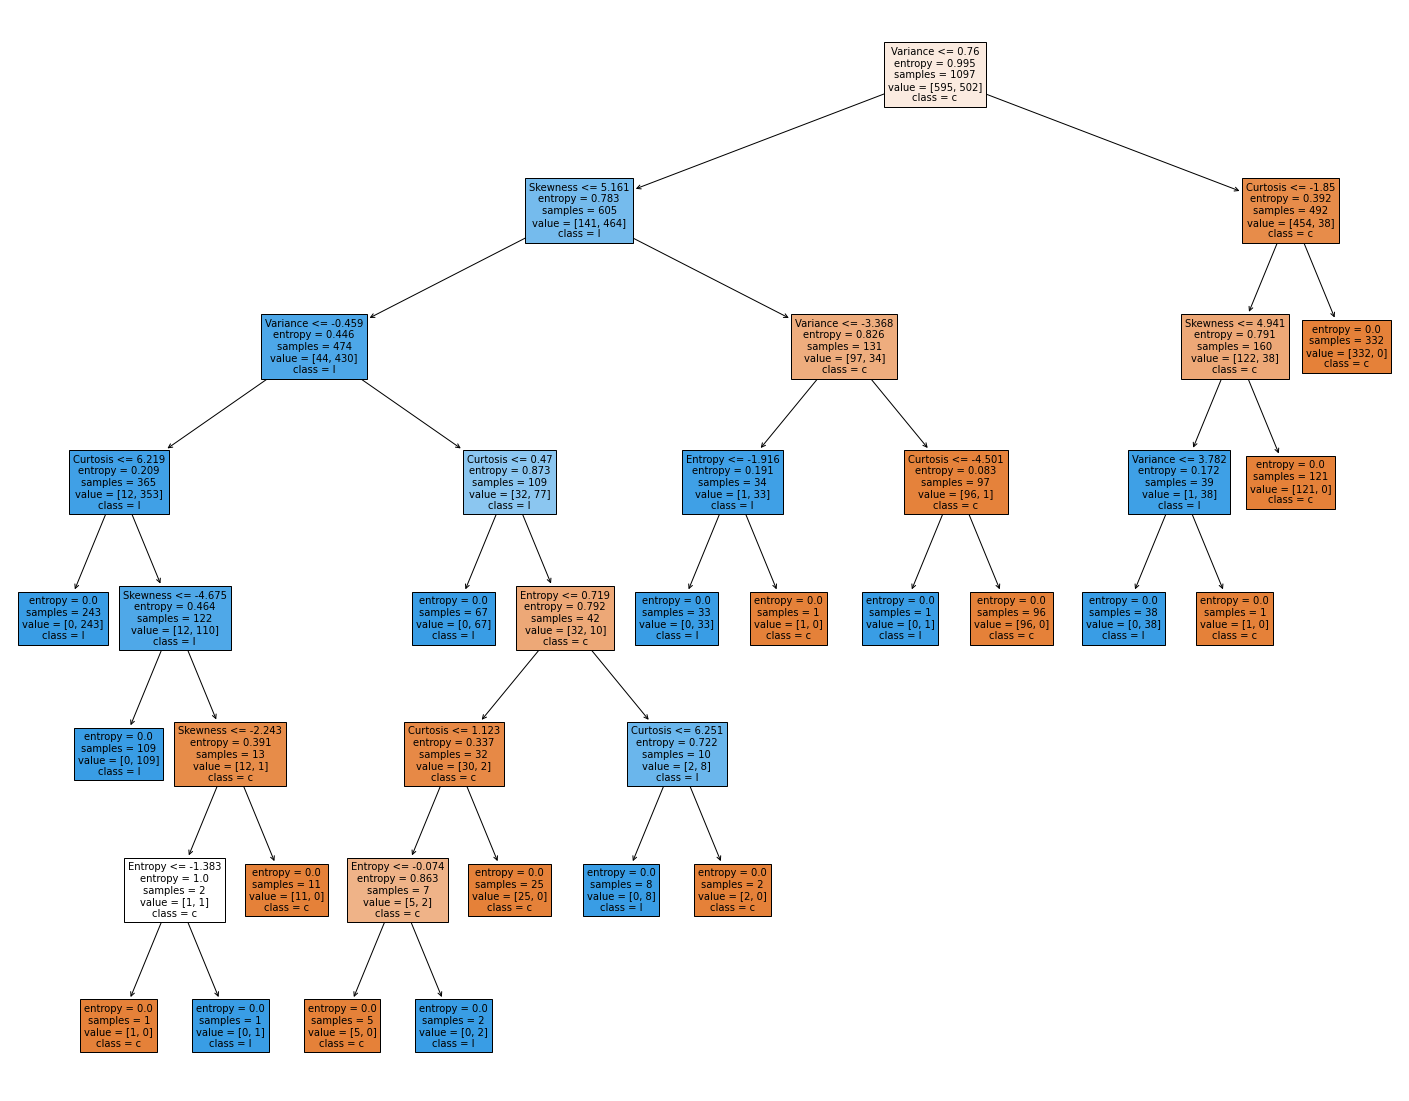

In [26]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model,feature_names=data.columns,  class_names='class',filled=True)

In [21]:
data[data.Variance <= .76].__len__()

743

In [22]:
607+490

1097

In [23]:
X_train.shape

(1097, 4)

In [24]:
X_train[X_train.Variance <= .76]

,Variance,Skewness,Curtosis,Entropy
241,-1.39310,1.566400,7.53820,0.784030
935,-1.84480,1.254000,0.27218,-1.072800
596,0.65497,5.181500,1.06730,-0.421130
842,-1.89690,-6.789300,5.27610,-0.325440
1087,0.51800,0.258650,-0.84085,0.961180
...,...,...,...,...
1263,-0.87834,3.257000,-3.67780,-3.294400
729,-0.95923,0.091039,6.22040,-1.482800
795,0.50813,0.477990,-1.98040,0.577140
916,-0.53900,-5.167000,3.43990,0.052141
